In [39]:
import pandas as pd

In [40]:
data_frame = pd.read_csv("train.csv")

In [41]:
data_frame

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [42]:
data_frame[["day", "month", "year"]] = data_frame["week"].str.split("/", expand=True)

In [43]:
data_frame = data_frame.drop("week", axis=1)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = data_frame.drop("units_sold", axis=1), data_frame["units_sold"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [46]:
model.score(x_test, y_test)

0.7757754347522927

In [47]:
model.score(x_train, y_train)

0.965775565337708

In [48]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

27.1239578063917

In [49]:
data_frame.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

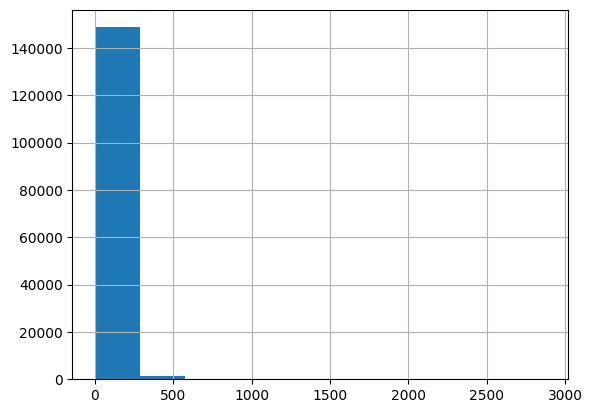

In [50]:
data_frame.units_sold.hist()

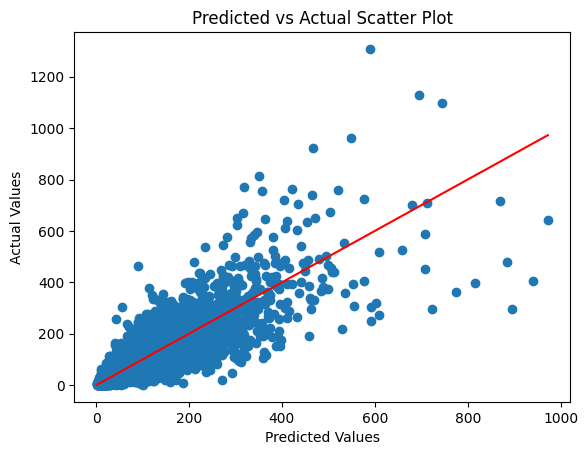

In [51]:
import matplotlib.pyplot as plt
import numpy as np 

plt.scatter(y_pred, y_test)
x_values = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.plot(x_values, x_values, color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Scatter Plot")
plt.show()

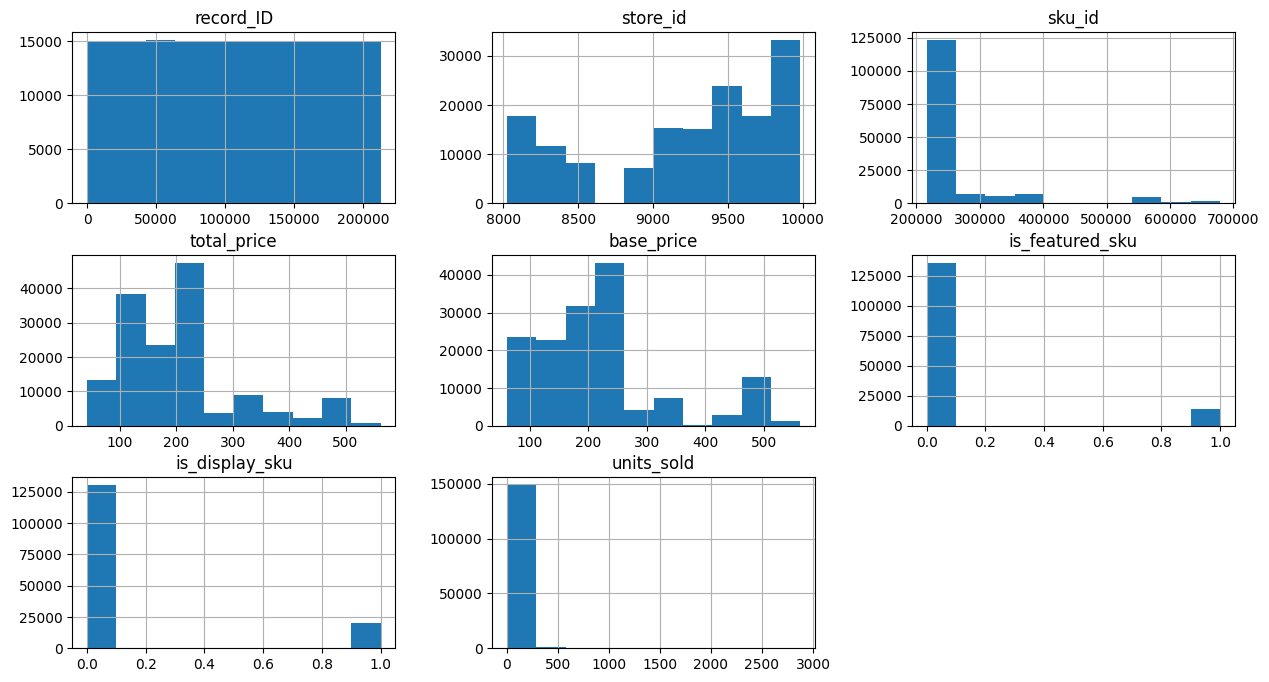

In [52]:
data_frame.hist(figsize=(15, 8))
plt.show()

In [53]:
data_frame = data_frame.drop("record_ID", axis=1)

In [54]:
data_frame

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [55]:
data_frame.store_id.unique()

array([8091, 8095, 8094, 8063, 8023, 8058, 8222, 8121, 8218, 8317, 8319,
       8392, 8398, 8400, 8422, 8438, 8555, 8562, 8869, 8991, 8911, 9001,
       9043, 9092, 9112, 9132, 9147, 9164, 9178, 9190, 9221, 9250, 9273,
       9279, 9281, 9328, 9371, 9442, 9430, 9439, 9425, 9432, 9436, 9456,
       9479, 9481, 9490, 9498, 9532, 9578, 9672, 9611, 9613, 9632, 9680,
       9700, 9713, 9731, 9745, 9770, 9789, 9813, 9823, 9837, 9809, 9845,
       9872, 9876, 9879, 9880, 9881, 9890, 9909, 9954, 9961, 9984])

In [56]:
len(data_frame.store_id.unique())

76

In [57]:
len(data_frame.sku_id.unique())

28

In [58]:
data_frame.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [59]:
data_frame.units_sold.quantile(0.99)

np.float64(283.0)

In [60]:
data_frame = data_frame[data_frame.units_sold < data_frame.units_sold.quantile(0.99)]

In [61]:
data_frame

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

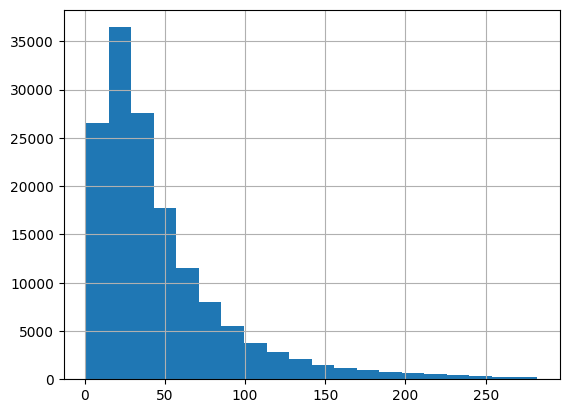

In [62]:
data_frame.units_sold.hist(bins=20)

In [63]:
data_frame = data_frame.join(pd.get_dummies(data_frame.store_id, prefix="store")).drop("store_id", axis=1)
data_frame = data_frame.join(pd.get_dummies(data_frame.sku_id, prefix="item")).drop("sku_id", axis=1)

In [64]:
model = RandomForestRegressor(n_jobs=-1)

x, y = data_frame.drop("units_sold", axis=1), data_frame["units_sold"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [66]:
model.score(x_test, y_test)

0.8253207625935859

In [67]:
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.84059133151497

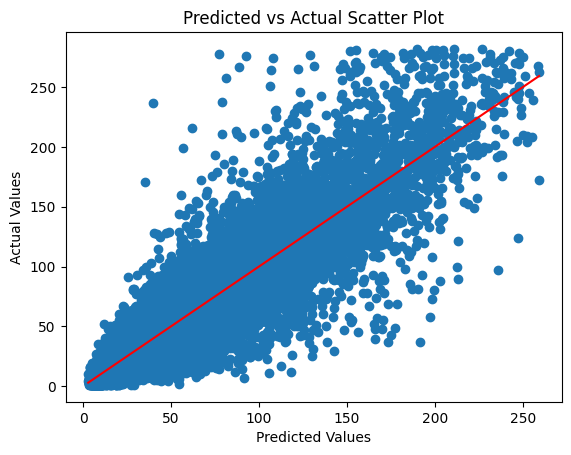

In [68]:
plt.scatter(y_pred, y_test)
x_values = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.plot(x_values, x_values, color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Scatter Plot")
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 20],
    "min_samples_split": [2, 3]
}

model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.2s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.1s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.0s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.1s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.0s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   1.7s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   1.7s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [74]:
best_model = grid_search.best_estimator_

In [75]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [76]:
best_model.score(x_test, y_test)

0.8176711143369274

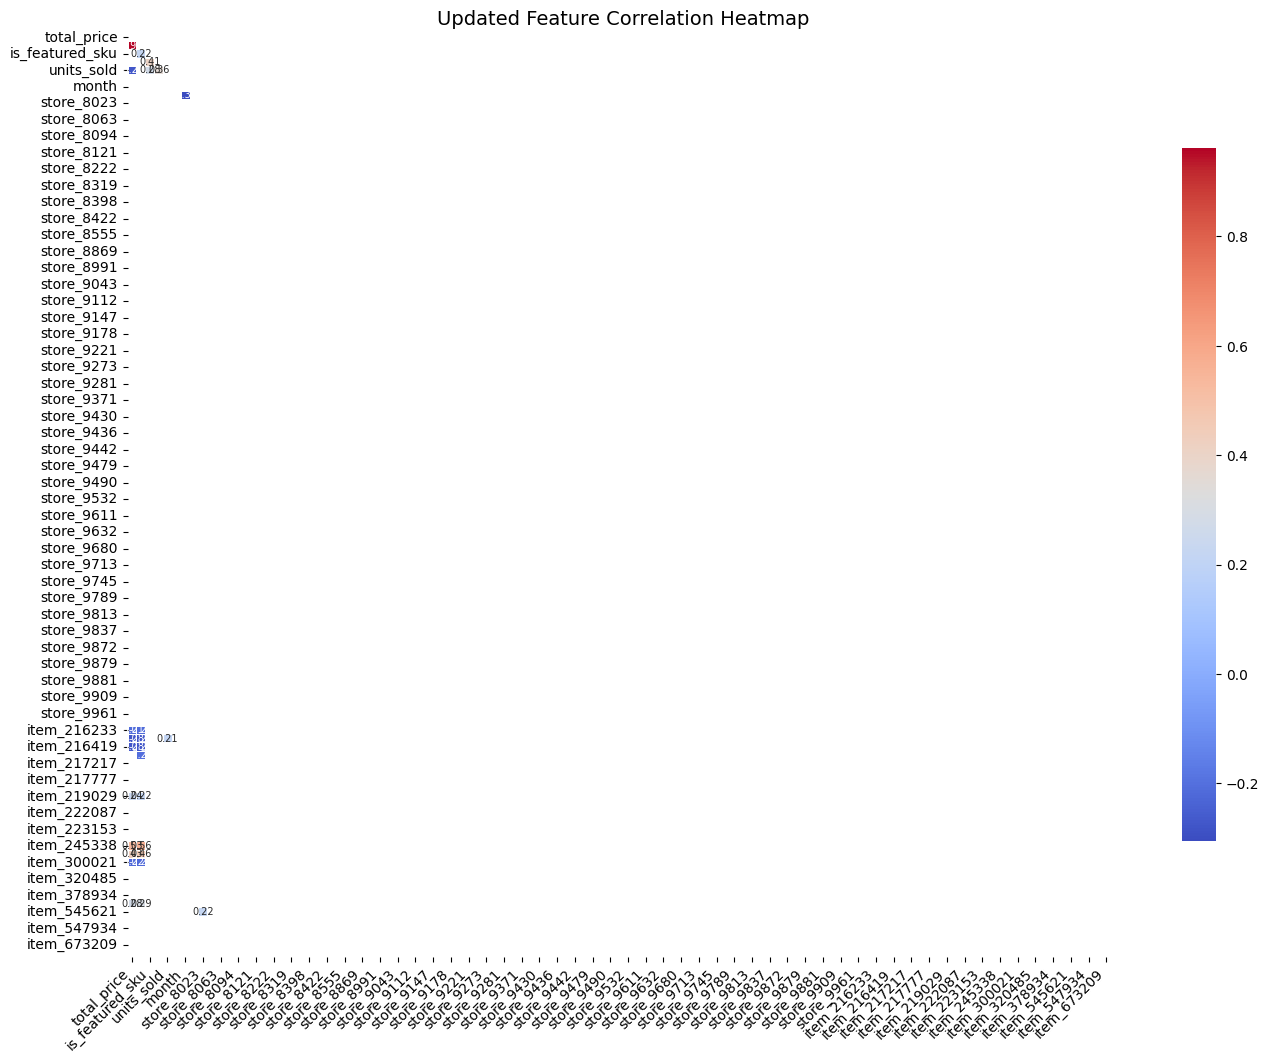

In [83]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

corr_matrix = data_frame.corr()
filtered_corr = corr_matrix[(corr_matrix > 0.2) | (corr_matrix < -0.2)]
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr,
           annot=True,
           fmt=".2f",
           cmap="coolwarm",
           mask=mask,
           linewidths=0.5,
           annot_kws={"size": 7},
           cbar_kws={"shrink": 0.75})

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title("Updated Feature Correlation Heatmap", fontsize=14)
plt.show()

In [89]:
print(data_frame.columns)

Index(['total_price', 'base_price', 'is_featured_sku', 'is_display_sku',
       'units_sold', 'day', 'month', 'year', 'store_8023', 'store_8058',
       ...
       'item_320485', 'item_327492', 'item_378934', 'item_398721',
       'item_545621', 'item_546789', 'item_547934', 'item_600934',
       'item_673209', 'item_679023'],
      dtype='object', length=112)


In [95]:
data_frame

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [96]:
data_frame["price_difference"] = data_frame["total_price"] - data_frame["base_price"]

data_frame["price_increase_pct"] = ((data_frame["total_price"] - data_frame["base_price"]) / data_frame["base_price"]) * 100

In [97]:
data_frame

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023,price_difference,price_increase_pct
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,-12.8250,-11.464968
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,0.0000,0.000000
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,0.0000,0.000000
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,0.0000,0.000000
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,0.0000,0.000000
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,0.0000,0.000000
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,-126.1125,-26.067747
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,True,False,False,False,-49.8750,-26.022305


In [98]:
import numpy as np

data_frame["log_total_price"] = np.log1p(data_frame["total_price"])
data_frame["log_base_price"] = np.log1p(data_frame["base_price"])

In [99]:
data_frame

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023,price_difference,price_increase_pct,log_total_price,log_base_price
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,-12.8250,-11.464968,4.605545,4.726170
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,0.0000,0.000000,4.605545,4.605545
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,0.0000,0.000000,4.904904,4.904904
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,0.0000,0.000000,4.904904,4.904904
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,0.0000,0.000000,4.956355,4.956355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,0.0000,0.000000,5.467374,5.467374
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,0.0000,0.000000,5.467374,5.467374
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,-126.1125,-26.067747,5.882417,6.183711
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,True,False,False,False,-49.8750,-26.022305,4.961358,5.260940
